In [2]:
#load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
SEED = 5000

In [5]:
# Read the data
df = pd.read_csv('https://raw.githubusercontent.com/PriyaVj-DS/assignments/master/datasets/IntrusionDetection.csv')

In [6]:
print(df.shape)

(97308, 42)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97308 entries, 0 to 97307
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     97308 non-null  int64  
 1   protocol_type                97308 non-null  object 
 2   service                      97308 non-null  object 
 3   flag                         97308 non-null  object 
 4   src_bytes                    97308 non-null  int64  
 5   dst_bytes                    97308 non-null  int64  
 6   land                         97308 non-null  int64  
 7   wrong_fragment               97308 non-null  int64  
 8   urgent                       97308 non-null  int64  
 9   hot                          97308 non-null  int64  
 10  num_failed_logins            97308 non-null  int64  
 11  logged_in                    97308 non-null  int64  
 12  num_compromised              97308 non-null  int64  
 13  root_shell      

In [8]:
df['Class'].value_counts()

0    97278
1       30
Name: Class, dtype: int64

In [9]:
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


In [10]:
print(df.isnull().sum())

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [11]:
df = df.select_dtypes(exclude = object)

In [12]:
df.shape

(97308, 39)

### Building a classification model


In [13]:
#seperate train and test set
df_train,df_test = train_test_split(df,test_size = 0.2, random_state = SEED,shuffle = True,stratify = df['Class'])

In [14]:
print(df.shape)
print(df_train.shape)
print(df_test.shape)

(97308, 39)
(77846, 39)
(19462, 39)


In [15]:
X_train,y_train = df_train.drop("Class",axis = 1).to_numpy(),df_train["Class"].to_numpy()
X_test,y_test = df_test.drop("Class",axis = 1).to_numpy(),df_test["Class"].to_numpy()

In [16]:
print(df_train.shape)
print(X_train.shape)
print(y_train.shape)

(77846, 39)
(77846, 38)
(77846,)


In [17]:
print(df_train.shape)
print(X_test.shape)
print(y_test.shape)

(77846, 39)
(19462, 38)
(19462,)


In [18]:
#Logistic Regression Classifier
logisticModel = LogisticRegression(random_state = SEED)
logisticModel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5000, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
# Performance metrics for classification model
def metrics(modelName,X_train,y_train,X_test,y_test): 
    y_test_pred = modelName.predict(X_test)
    print('Confusion Matrix')
    # print out confusion matrix
    cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
    print(cm)
    
    # calculate accuracy on test set    
    accuracyScoreTest = accuracy_score(y_true=y_test, y_pred=y_test_pred)
    print('Accuracy of Test Set : ' + str(accuracyScoreTest))
    
    # prediction accuracy on training set
    y_train_pred = modelName.predict(X_train)
    accuracyScoreTrain = accuracy_score(y_true=y_train, y_pred=y_train_pred)
    print('Accuracy of Train Set : ' + str(accuracyScoreTrain))
    
    # Draw ROC curve
    y_test_prob = modelName.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_test_prob)
    roc_auc = roc_auc_score(y_true=y_test, y_score=y_test_prob)
    plt.plot(fpr, tpr, color="blue", label="AUC = %0.2f" % roc_auc)
    plt.plot([0, 1], [0, 1], color="red", linestyle="--", lw=1)
    plt.title("Receiver Operating Characteristic")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.show()
    
    # comprehensive classification report
    print(classification_report(y_true=y_test, y_pred=y_test_pred)) 

**********************Logistic Regression***********************
Confusion Matrix
[[19456     0]
 [    6     0]]
Accuracy of Test Set : 0.9996917069160415
Accuracy of Train Set : 0.9997045448706421


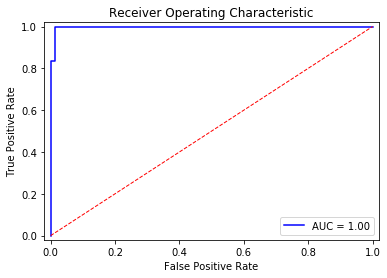

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19456
           1       0.00      0.00      0.00         6

    accuracy                           1.00     19462
   macro avg       0.50      0.50      0.50     19462
weighted avg       1.00      1.00      1.00     19462



In [36]:
print("**********************Logistic Regression***********************")
# Performance metrics calculation 
metrics(logisticModel,X_train,y_train,X_test,y_test)

### Mitigate class imbalance by instance sampling(SMOTE)

In [25]:
smt = SMOTE(random_state = SEED)
print(smt)

SMOTE(k_neighbors=5, n_jobs=None, random_state=5000, sampling_strategy='auto')


In [26]:
X_train_res,y_train_res = smt.fit_resample(X_train,y_train)

In [28]:
# Data dimension before and after Smote
print(X_train.shape)
print(X_train_res.shape)

(77846, 38)
(155644, 38)


In [30]:
# Data dimension before and after Smote
print(y_train.shape)
print(y_train_res.shape)

(77846,)
(155644,)


In [31]:
print(pd.crosstab(y_train,"count"))
print(pd.crosstab(y_train_res,"count"))

col_0  count
row_0       
0      77822
1         24
col_0  count
row_0       
0      77822
1      77822


In [32]:
logisticModel_res  = LogisticRegression(random_state = SEED)

logisticModel_res.fit(X_train_res,y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5000, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Confusion Matrix
[[19206   250]
 [    1     5]]
Accuracy of Test Set : 0.9871030726544034
Accuracy of Train Set : 0.9246742566369407


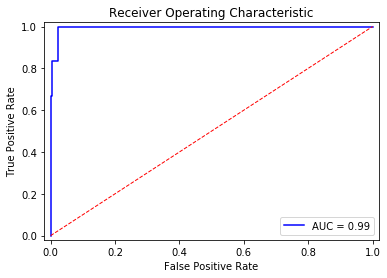

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     19456
           1       0.02      0.83      0.04         6

    accuracy                           0.99     19462
   macro avg       0.51      0.91      0.52     19462
weighted avg       1.00      0.99      0.99     19462



In [37]:
metrics(logisticModel_res,X_train_res,y_train_res,X_test,y_test)

## Mitigate class imbalance by instance reweighting


In [38]:
logisticModel_reweight = LogisticRegression(random_state = SEED,class_weight = "balanced")

In [39]:
logisticModel_reweight.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5000, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Confusion Matrix
[[19314   142]
 [    1     5]]
Accuracy of Test Set : 0.9926523481656562
Accuracy of Train Set : 0.9923567042622614


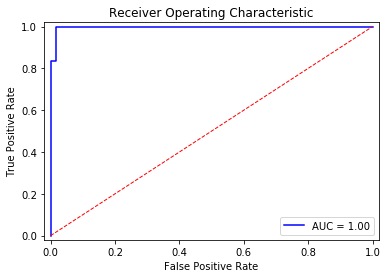

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     19456
           1       0.03      0.83      0.07         6

    accuracy                           0.99     19462
   macro avg       0.52      0.91      0.53     19462
weighted avg       1.00      0.99      1.00     19462



In [40]:
metrics(logisticModel_reweight,X_train,y_train,X_test,y_test)